In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import HOTS.libUnpackAtis as ua
import HOTS.libDataHelper as dh
from HOTS.GestExp import GestExp, MonitorHisto
from HOTS.GestExp import save_object, load_object, Classify
from HOTS.Monitor import DisplaySurface2D


In [3]:
settingsFile = "/Users/boutin.v/Documents/DataBase/GEST/newlayer_digit.hotsnetwork"
#specs = dh.superLoadHOTSNetworkSettingsFromFile(settingsFile, True)
#dbspecs = dh.superReadDB(specs.db_file, specs.db_path)


records_path = '../Records/EXP_04_GestureMaro/'

## 1 polarity, 5*5 patches, 14 dico

In [4]:

Records = False
nb_dico = 14
R = 2
tau = 0.03

if Records == True:
    Exp0 = GestExp(settingsFile,nb_dico=nb_dico,R=R,tau=tau,verbose=1)
    Prototype = Exp0.learnMaro(nb_file=250)
    training_data = Exp0.GenerateHistogramMaro(train=True,nb_file=200)
    testing_data = Exp0.GenerateHistogramMaro(train=False)
    save_object(Exp0,records_path + 'Exp1_2017_12_16.pkl')
else : 
    Exp0 = load_object(records_path + 'Exp1_2017_12_16.pkl')


classification accuracy : 76.67 %


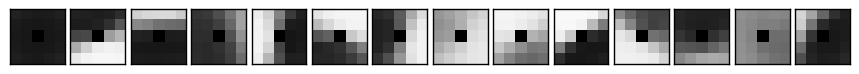

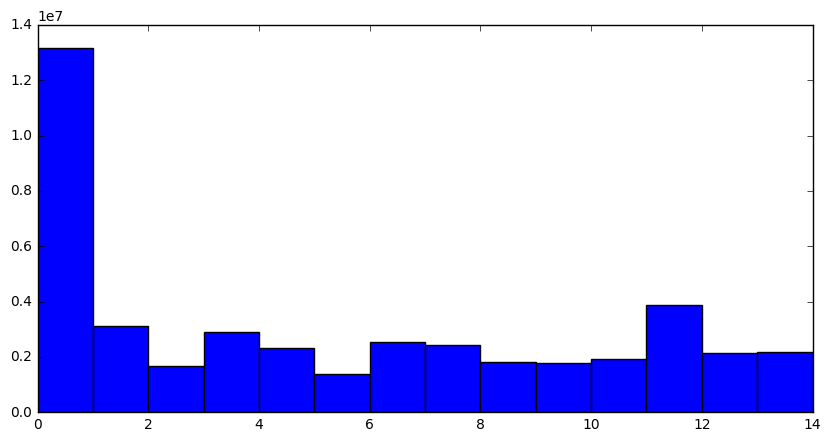

In [5]:
accuracy = Classify(Exp0.training_data,Exp0.testing_data)
print('classification accuracy : {0:.2f} %'.format(accuracy*100))
DisplaySurface2D(Exp0.Prototype,nb_polarities=1)
MonitorHisto(Exp0.total_activation)

In [6]:

Records = False
nb_dico = 14
R = 2
tau = 0.03

if Records == True:
    Exp0 = GestExp(settingsFile,nb_dico=nb_dico,R=R,tau=tau,verbose=1)
    Prototype = Exp0.learnMaro(nb_file=500)
    training_data = Exp0.GenerateHistogramMaro(train=True,nb_file=500)
    testing_data = Exp0.GenerateHistogramMaro(train=False)
    save_object(Exp0,records_path + 'Exp2_2017_12_16.pkl')
else : 
    Exp0 = load_object(records_path + 'Exp2_2017_12_16.pkl')



classification accuracy : 83.33 %


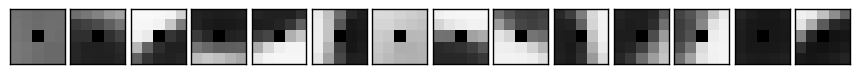

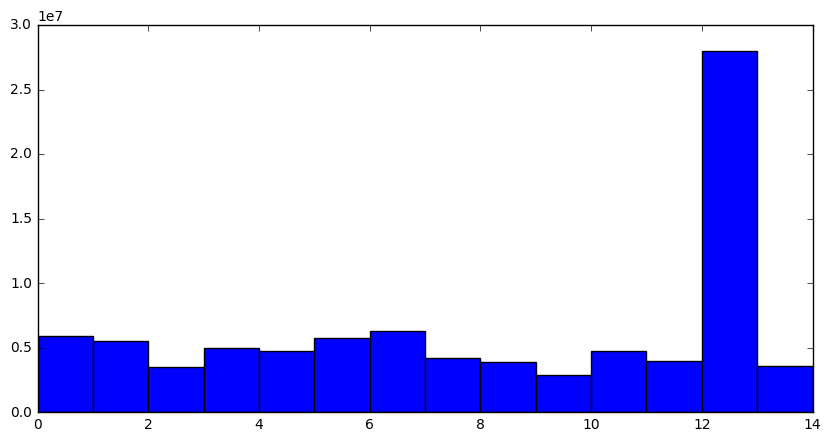

In [7]:
accuracy = Classify(Exp0.training_data,Exp0.testing_data)
print('classification accuracy : {0:.2f} %'.format(accuracy*100))
DisplaySurface2D(Exp0.Prototype,nb_polarities=1)
MonitorHisto(Exp0.total_activation)

In [8]:

Records = True
nb_dico = 14
R = 2
tau = 0.03

if Records == True:
    Exp0 = GestExp(settingsFile,nb_dico=nb_dico,R=R,tau=tau,verbose=1)
    Prototype = Exp0.learnHomeo2(nb_file=100,eta_homeo=0.5)
    training_data = Exp0.GenerateHistogramMaro(train=True,nb_file=100)
    testing_data = Exp0.GenerateHistogramMaro(train=False)
    #save_object(Exp0,records_path + 'Exp3_2017_12_16.pkl')
else : 
    Exp0 = load_object(records_path + 'Exp3_2017_12_16.pkl')




------ Loaded settings ------
Enable viewer: True (Port: 3330, update 8)
 
Number of polarities of the input: 1
Number of dimensions and sizes: 2, [304 240]
Number of layers: 1
> 8, 10000.0, 2
Number of fixed layers: 0
 
Data file: none
DB file: /Users/boutin.v/Documents/DataBase/GEST/testoids_1.db
DB path: /Users/boutin.v/Documents/DataBase/GEST/complete_chris_db/
Workdir path: 
Save id: 
------ End of settings ------
 
840 files in the DB.
Training on 100 files
learned file 10/100
learned file 20/100
learned file 30/100
learned file 40/100
learned file 50/100
learned file 60/100
learned file 70/100
learned file 80/100
learned file 90/100
learned file 100/100
coding on training db
coded file 10/100
coded file 20/100
coded file 30/100
coded file 40/100
coded file 50/100
coded file 60/100
coded file 70/100
coded file 80/100
coded file 90/100
coded file 100/100
coding on testing db
coded file 10/60
coded file 20/60
coded file 30/60
coded file 40/60
coded file 50/60
coded file 60/60


classification accuracy : 90.00 %


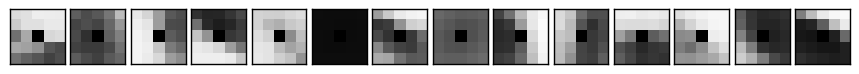

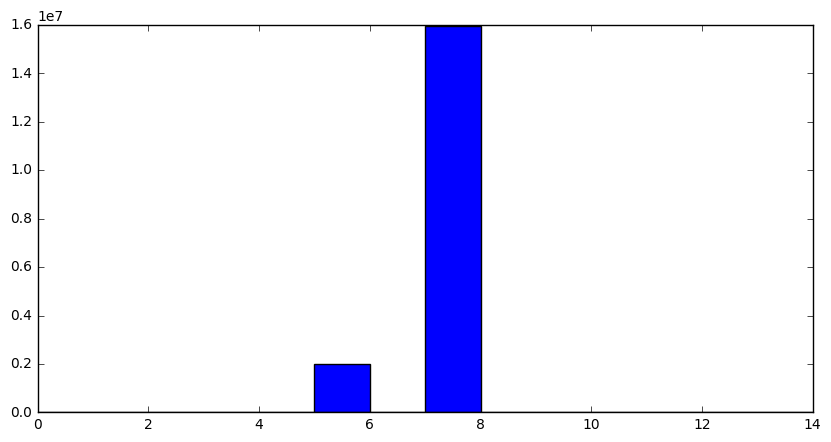

In [9]:
accuracy = Classify(Exp0.training_data,Exp0.testing_data)
print('classification accuracy : {0:.2f} %'.format(accuracy*100))
DisplaySurface2D(Exp0.Prototype,nb_polarities=1)
MonitorHisto(Exp0.total_activation)

In [10]:
stop_here

NameError: name 'stop_here' is not defined

In [ ]:
Modulation = np.random.rand(14)
print(Modulation.shape)
Surface = np.ones((14,25))
print(Surface.shape)
Proto = np.random.rand(14,25)
print(Proto.shape)
a = np.linalg.norm(Modulation[:,None]*(Surface-Proto),ord=2,axis=1)

In [ ]:
'''
activation = nb_activation + nb_activ
target = torch.mean(activation)#(nb_image*l0_sparseness)//nb_dico
tau = - (torch.max(activation)-target)/np.log(0.2)
#tau = -(nb_image*l0_sparseness-target)/np.log(0.2)
mu = 0.3
#modulation_exp = (1-mu)*Modulation + mu*(5*torch.exp(-(nb_activation-target)/tau))
modulation_exp = torch.exp( (1-mu)*torch.log(Modulation) - mu*((activation-target)/tau))
#print(modulation_exp)
#print(modulation_exp.size())
mean_res = torch.mean(res)
tau = - torch.max(activation)/np.log(0.5)
'''

In [ ]:
Prototype1,res,nb_proto  = learn1(dbspecs,nb_file=50,verbose=1)


In [ ]:
DisplaySurface2D(Prototype1,nb_polarities=1)
MonitorHisto(nb_proto)

In [ ]:
plt.plot(res)

In [ ]:
    def GenerateHistogram(dico, database, train=True, nb_file=None):
        SpTe_Layer1 = STS(tau=0.03, R=2, initial_time=1)
        if train == True and nb_file==None:
            nb_file = np.sum(np.array(database.dblabels) == 1)
        if train == False and nb_file==None:
            nb_file = np.sum(np.array(database.dblabels) == 2)
        if train== True:
            mode = 1
            if self.verbose!=0:
                print('coding on training db')
        else :
            if self.verbose!=0:
                print('coding on testing db')
            mode = 2
        nb_dico = dico.shape[0]
        all_histo = np.zeros((nb_file,nb_dico))
        labels = np.zeros(nb_file)
        idx_train = 1
        for idf, dblabel in enumerate(database.dblabels):
            if dblabel == mode :
                if (self.verbose!=0) and (idx_train % 10 == 0):
                    print('coded file {0}/{1}'.format(idx_train, nb_file))

                histo = np.zeros(nb_dico).astype(int)

                filepath = database.path + database.filenames[idf]
                event = LoadGestureDB(filepath, OutOnePolarity=True)
                Surface_Layer1 = SpTe_Layer1.create(event = event,kernel='linear')
                filt = np.sum(Surface_Layer1, axis = 1) > 2*R
                Surface_Layer2 = Surface_Layer1[filt,:]

                for idx, Si in enumerate(Surface_Layer2):
                    #Distance_to_proto = np.linalg.norm(Si - self.Prototype,ord=2,axis=1)
                    #closest_proto_idx = np.argmin(Distance_to_proto)
                    
                    histo[closest_proto_idx] += 1

                all_histo[idx_train-1,:] = histo/np.sum(histo)
                labels[idx_train-1] = self.dbspecs.labelids[idf]
                if idx_train == nb_file:
                    break
                idx_train+=1
        return (all_histo,labels)

In [ ]:
def GenerateHistogram1(dico, database, train=True, nb_file=None, verbose=0):
    if train == True and nb_file==None:
        nb_file = np.sum(np.array(database.dblabels) == 1)
    if train == False and nb_file==None:
        nb_file = np.sum(np.array(database.dblabels) == 2)
    if train== True:
        mode = 1
        if verbose!=0:
            print('coding on training db')
    else :
        if verbose!=0:
            print('coding on testing db')
        mode = 2
        
    nb_dico = dico.shape[0]
    all_histo = np.zeros((nb_file,nb_dico))
    labels = np.zeros(nb_file)
    idx_train = 1
    for idf, dblabel in enumerate(database.dblabels):
        if dblabel == mode :
            if (verbose!=0) and (idx_train % 10 == 0):
                print('coded file {0}/{1}'.format(idx_train, nb_file))
            
            histo = np.zeros(nb_dico).astype(int)

            filepath = database.path + database.filenames[idf]
            event = LoadGestureDB(filepath, OutOnePolarity=True)
            Surface_Layer1 = SpTe_Layer1.create(event = event,kernel='linear')
            filt = np.sum(Surface_Layer1, axis = 1) > 2*R
            Surface_Layer2 = Surface_Layer1[filt,:] 
            corr = Surface_Layer2 @ dico.T
            for idx, Si in enumerate(Surface_Layer2):
                c = corr[idx, :].copy()
                closest_proto_idx = np.argmax(c)
                #Distance_to_proto = np.linalg.norm(Si - Prototype1,ord=2,axis=1)
                #closest_proto_idx = np.argmin(Distance_to_proto)
                histo[closest_proto_idx] += 1

            all_histo[idx_train-1,:] = histo/np.sum(histo)
            labels[idx_train-1] = database.labelids[idf]
            if idx_train == nb_file:
                break
            idx_train+=1
    return (all_histo,labels)